In [1]:
from loader import Loader

In [2]:
tds = Loader.load_imgs("train")

In [3]:
tds.shape

(20000, 64, 64, 3)

In [4]:
vds = Loader.load_imgs("val")

In [5]:
vds.shape

(10000, 64, 64, 3)

In [6]:
from factory import ModelFactory

In [40]:
enc_dec = ModelFactory.get_enc_dec()

In [41]:
from helper import Helper

In [ ]:
Helper.train_enc_dec(enc_dec, (tds, tds), (vds, vds), 64, 100, 0.01, 0.0)

Train on 20000 samples, validate on 10000 samples
Epoch 1/100
19904/20000 [============================>.] - ETA: 0s - loss: 3.7471
Epoch 00001: val_loss improved from inf to 2.57713, saving model to Model/tmp_enc_dec.h5
20000/20000 [==============================] - 13s 672us/sample - loss: 3.7391 - val_loss: 2.5771
Epoch 2/100
19904/20000 [============================>.] - ETA: 0s - loss: 2.1994
Epoch 00002: val_loss improved from 2.57713 to 2.09370, saving model to Model/tmp_enc_dec.h5
20000/20000 [==============================] - 12s 582us/sample - loss: 2.1972 - val_loss: 2.0937
Epoch 3/100
19904/20000 [============================>.] - ETA: 0s - loss: 1.9872
Epoch 00003: val_loss improved from 2.09370 to 1.95316, saving model to Model/tmp_enc_dec.h5
20000/20000 [==============================] - 12s 579us/sample - loss: 1.9853 - val_loss: 1.9532
Epoch 4/100
19904/20000 [============================>.] - ETA: 0s - loss: 1.8706
Epoch 00004: val_loss improved from 1.95316 to 1.8515

In [11]:
from data_utils import get_val_batch, get_test_batch
import numpy as np

In [23]:
test_batch = get_test_batch(0, 1)
test_imgs = np.asarray([test_batch[0, 0], test_batch[0, 1], test_batch[0, 6]])

In [24]:
test_predicted = enc_dec.predict(test_imgs)

In [25]:
train_imgs = np.asarray([tds[0], tds[10], tds[20]])

In [26]:
predicted = enc_dec.predict(train_imgs)

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_three(imgs, predicted):
    for i in range(3):
        plt.subplot(2, 3, i+1)
        plt.imshow(imgs[i])
        plt.subplot(2, 3, i+4)
        plt.imshow(predicted[i])

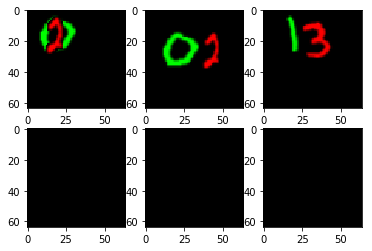

In [28]:
show_three(train_imgs, predicted)

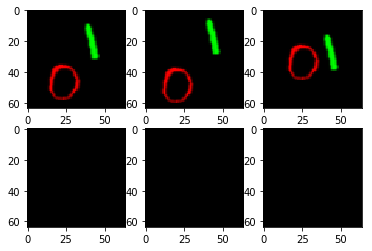

In [29]:
show_three(test_imgs, test_predicted)

In [31]:
from sklearn.metrics import mean_absolute_error

def check_mae(imgs, predicteds):
    maes = np.zeros(imgs.shape[0] * imgs.shape[3], dtype=np.float32)
    for i in range(imgs.shape[0]):
        for j in range(imgs.shape[3]):
            maes[i * 3 + j] = mean_absolute_error(imgs[i, :, :, j], predicteds[i, :, :, j])
    return np.average(maes)

In [33]:
check_mae(train_imgs, predicted)

0.019995278

In [34]:
check_mae(test_imgs, test_predicted)

0.01642444